In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import seaborn as sns
import io
fontsize=15

data = pd.read_csv('../data/5cm.csv')

mu_0 = 4 * np.pi * 10**(-7) # H/m
e_over_m = 

In [2]:
def remove_unnamed(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

data = remove_unnamed(data)

In [3]:
data['r (m)'] = data['r (cm)'] / 100
data['dr (m)'] = data['dr (cm)'] / 100

In [4]:
mu_0 = 4 * np.pi * 10**(-7)
N = 124 # number of turns
a = 0.15 # metres [coil separation]
k = (8 * mu_0 * N) / (np.sqrt(125) * a)

# e/m measurement

## diameter = 0.1 m

In [5]:
data5 = data.query('`r (m)` == 0.05').reset_index(drop=True).copy()
data5['B (T)'] = k * data5['I_H (A)']
data5['dB (T)'] = k * data5['d I_H(A)']
data5['r^2 B^2 (m^2 T^2)'] = data5['r (m)'].values**2 * data5['B (T)'].values**2
data5['d r^2 B^2 (m^2 T^2)'] = 2 * np.sqrt((data5['dr (m)'] / data5['r (m)'])**2 + (data5['dB (T)'] / data5['B (T)'])**2)

6.958133501650681e-12 -1.6156465883986298e-09
143716702153.35327


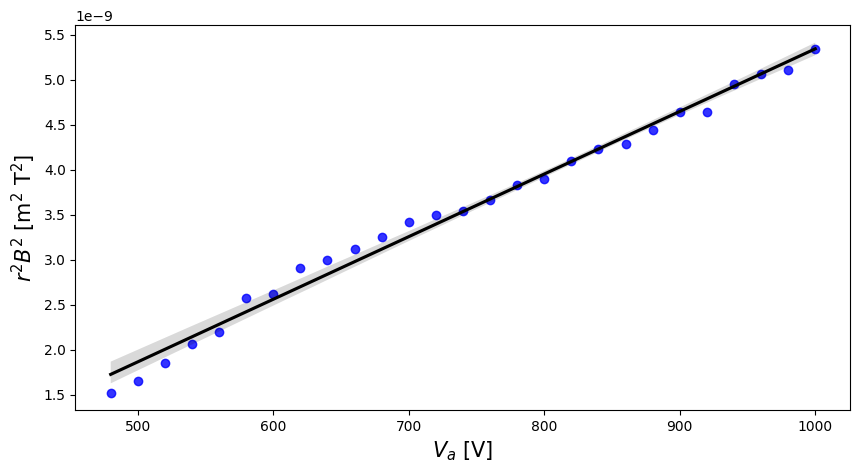

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.regplot(
    x=2*data5['V_a (V)'], 
    y=data5['r^2 B^2 (m^2 T^2)'],
    ax=ax,
    color='blue',
    line_kws={'color': 'k'}
)
ax.set_ylabel(r'$r^2 B^2$ [m$^2$ T$^2$]', fontsize=fontsize)
ax.set_xlabel(r'$V_a$ [V]', fontsize=fontsize)
plt.savefig('../tex/figures/em5cm.png', bbox_inches='tight')
slope5, intercept, _, _, _ = linregress(2*data5['V_a (V)'], data5['r^2 B^2 (m^2 T^2)'])
print(slope5, intercept)
print(1/slope5)
plt.show()

In [7]:
def linear_func(x, m, c):
    return x * m + c

popt, pcov = curve_fit(linear_func, 2*data5['V_a (V)'], data5['r^2 B^2 (m^2 T^2)'])
slope, intercept = popt[0], popt[1]
std_err_slope = np.sqrt(pcov[0, 0])
print(slope, std_err_slope)


6.9581335016506805e-12 1.4365812360099837e-13


## diameter = 0.08 m

In [8]:
data4 = data.query('`r (m)` == 0.04').reset_index(drop=True).copy()
data4['B (T)'] = k * data4['I_H (A)']
data4['r^2 B^2 (m^2 T^2)'] = data4['r (m)'].values**2 * data4['B (T)'].values**2
data4

,V_a (V),d V_a (V),I_H (A),d I_H(A),r (cm),dr (cm),r (m),dr (m),B (T),r^2 B^2 (m^2 T^2)
0,500,2,2.4244,0.0004,4,0.05,0.04,0.0005,0.001802,5.196119e-09
1,490,2,2.3933,0.0010,4,0.05,0.04,0.0005,0.001779,5.063663e-09
2,480,2,2.3750,0.0010,4,0.05,0.04,0.0005,0.001765,4.986522e-09
3,470,2,2.3421,0.0001,4,0.05,0.04,0.0005,0.001741,4.849326e-09
4,460,2,2.3317,0.0004,4,0.05,0.04,0.0005,0.001733,4.806355e-09
5,450,2,2.2939,0.0002,4,0.05,0.04,0.0005,0.001705,4.651783e-09
6,440,2,2.2565,0.0002,4,0.05,0.04,0.0005,0.001677,4.501334e-09
7,430,2,2.2353,0.0003,4,0.05,0.04,0.0005,0.001662,4.417150e-09
8,420,2,2.1965,0.0002,4,0.05,0.04,0.0005,0.001633,4.265137e-09
9,410,2,2.1795,0.0002,4,0.05,0.04,0.0005,0.001620,4.199371e-09


6.700278778466742e-12 -1.3640641114233448e-09
149247521344.0052


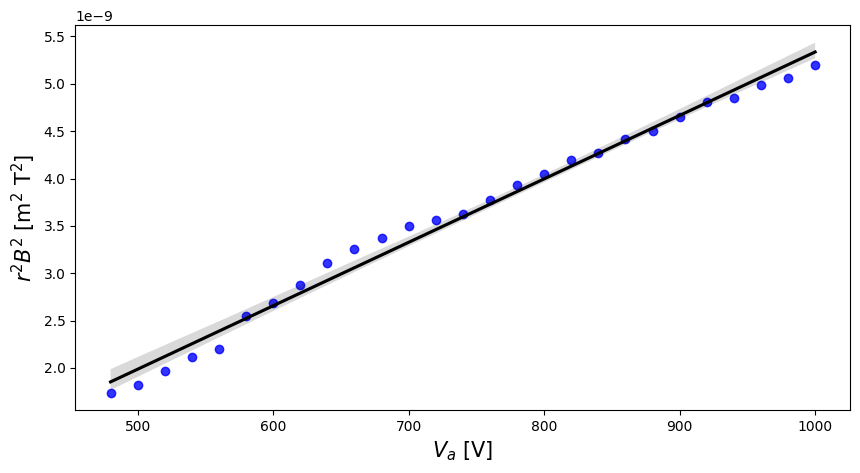

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.regplot(
    x=2*data4['V_a (V)'], 
    y=data4['r^2 B^2 (m^2 T^2)'],
    ax=ax,
    color='blue',
    line_kws={'color': 'k'}
)
ax.set_ylabel(r'$r^2 B^2$ [m$^2$ T$^2$]', fontsize=fontsize)
ax.set_xlabel(r'$V_a$ [V]', fontsize=fontsize)
plt.savefig('../tex/figures/em4cm.png', bbox_inches='tight')
slope4, intercept, _, _, _ = linregress(2*data4['V_a (V)'], data4['r^2 B^2 (m^2 T^2)'])
print(slope4, intercept)
print(1/slope4)
plt.show()

## diameter = 0.06 m

In [10]:
data3 = data.query('`r (m)` == 0.03').reset_index(drop=True).copy()
display(data3)
data3['B (T)'] = k * data3['I_H (A)']
data3['dB (T)'] = k * data3['d I_H(A)']
data3['r^2 B^2 (m^2 T^2)'] = data3['r (m)'].values**2 * data3['B (T)'].values**2
data3

,V_a (V),d V_a (V),I_H (A),d I_H(A),r (cm),dr (cm),r (m),dr (m)
0,450,2,2.7439,0.0001,3,0.05,0.03,0.0005
1,440,2,2.7169,0.0010,3,0.05,0.03,0.0005
2,430,2,2.6718,0.0001,3,0.05,0.03,0.0005
3,420,2,2.6183,0.0001,3,0.05,0.03,0.0005
4,410,2,2.5797,0.0001,3,0.05,0.03,0.0005
5,400,2,2.5075,0.0001,3,0.05,0.03,0.0005
6,390,2,2.4645,0.0002,3,0.05,0.03,0.0005
7,380,2,2.3960,0.0005,3,0.05,0.03,0.0005
8,370,2,2.3448,0.0002,3,0.05,0.03,0.0005
9,360,2,2.3202,0.0010,3,0.05,0.03,0.0005


,V_a (V),d V_a (V),I_H (A),d I_H(A),r (cm),dr (cm),r (m),dr (m),B (T),dB (T),r^2 B^2 (m^2 T^2)
0,450,2,2.7439,0.0001,3,0.05,0.03,0.0005,0.002040,7.433191e-08,3.743946e-09
1,440,2,2.7169,0.0010,3,0.05,0.03,0.0005,0.002020,7.433191e-07,3.670628e-09
2,430,2,2.6718,0.0001,3,0.05,0.03,0.0005,0.001986,7.433191e-08,3.549776e-09
3,420,2,2.6183,0.0001,3,0.05,0.03,0.0005,0.001946,7.433191e-08,3.409038e-09
4,410,2,2.5797,0.0001,3,0.05,0.03,0.0005,0.001918,7.433191e-08,3.309264e-09
5,400,2,2.5075,0.0001,3,0.05,0.03,0.0005,0.001864,7.433191e-08,3.126619e-09
6,390,2,2.4645,0.0002,3,0.05,0.03,0.0005,0.001832,1.486638e-07,3.020304e-09
7,380,2,2.3960,0.0005,3,0.05,0.03,0.0005,0.001781,3.716595e-07,2.854741e-09
8,370,2,2.3448,0.0002,3,0.05,0.03,0.0005,0.001743,1.486638e-07,2.734039e-09
9,360,2,2.3202,0.0010,3,0.05,0.03,0.0005,0.001725,7.433191e-07,2.676972e-09


5.3947118424410156e-12 -1.1599249226499631e-09
185366712663.47324


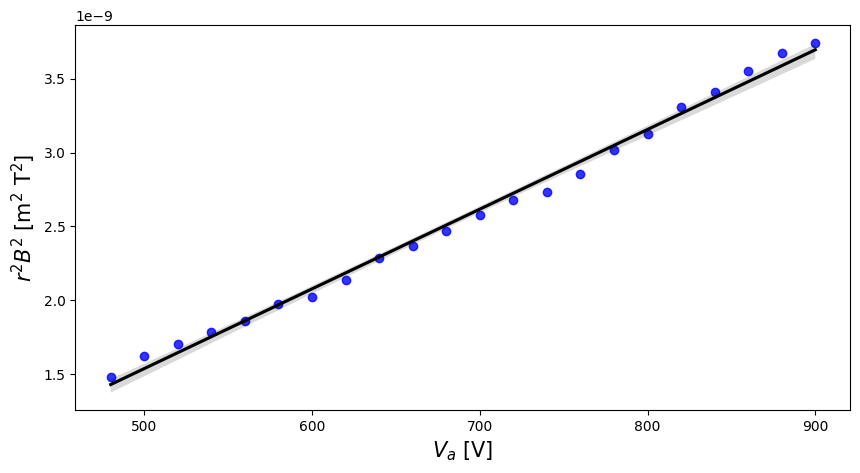

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.regplot(
    x=2*data3['V_a (V)'], 
    y=data3['r^2 B^2 (m^2 T^2)'],
    ax=ax,
    color='blue',
    line_kws={'color': 'k'}
)
ax.set_ylabel(r'$r^2 B^2$ [m$^2$ T$^2$]', fontsize=fontsize)
ax.set_xlabel(r'$V_a$ [V]', fontsize=fontsize)
plt.savefig('../tex/figures/em3cm.png', bbox_inches='tight')
slope3, intercept, _, _, _ = linregress(2*data3['V_a (V)'], data3['r^2 B^2 (m^2 T^2)'])
print(slope3, intercept)
print(1/slope3)
plt.show()

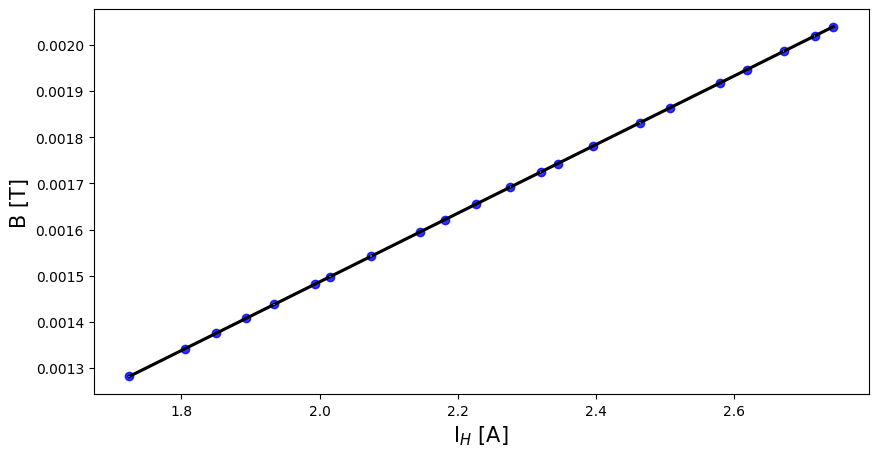

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.regplot(
    x=data3['I_H (A)'],
    y=data3['B (T)'],
    color='blue',
    line_kws={'color': 'k'},
    ax=ax,
)
ax.errorbar(
    data3['I_H (A)'],
    data3['B (T)'],
    fmt='none',
    xerr=data3['d I_H(A)'],
    yerr=data3['dB (T)']
)
ax.set_xlabel(r'I$_H$ [A]', fontsize=fontsize)
ax.set_ylabel(r'B [T]', fontsize=fontsize)
plt.savefig('../tex/figures/BvI_6cm.png', bbox_inches='tight')

In [13]:
em5 = 1 / slope5
em4 = 1 / slope4
em3 = 1 / slope3
average_em = np.mean([em5, em4, em3])
print(f'Average e/m measurement: {average_em}')
print(em5, em4, em3)

Average e/m measurement: 159443645386.94388
143716702153.35327 149247521344.0052 185366712663.47324


# Thermionic emission

In [14]:
positive = pd.read_csv('../data/positive_anode_connection.csv')
negative = pd.read_csv('../data/negative_anode_connection.csv')

for df in [positive, negative]:
    df['I (A)'] = df['I (mA)'] / 1000
    df['dI (A)'] = df['dI (mA)'] / 1000
    display(df)

,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,0.001,0.003,0.0086,0.0001,0.000009,1.000000e-07
1,5.350,0.010,0.4612,0.0005,0.000461,5.000000e-07
2,10.043,0.002,0.9907,0.0003,0.000991,3.000000e-07
3,15.087,0.001,1.8264,0.0002,0.001826,2.000000e-07
4,19.879,0.001,2.8418,0.0001,0.002842,1.000000e-07
5,25.133,0.001,4.1371,0.0003,0.004137,3.000000e-07
6,29.922,0.001,5.4439,0.0003,0.005444,3.000000e-07
7,34.751,0.010,6.8651,0.0005,0.006865,5.000000e-07
8,39.721,0.001,8.4129,0.0002,0.008413,2.000000e-07
9,44.488,0.003,9.9814,0.0007,0.009981,7.000000e-07


,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,-0.143,0.001,0.0058,0.0001,5.800000e-06,1.000000e-07
1,-5.307,0.001,-0.0006,0.0001,-6.000000e-07,1.000000e-07
2,-10.174,0.001,-0.0011,0.0001,-1.100000e-06,1.000000e-07
3,-14.977,0.002,-0.0015,0.0001,-1.500000e-06,1.000000e-07
4,-19.966,0.001,-0.0022,0.0001,-2.200000e-06,1.000000e-07
5,-25.303,0.001,-0.0028,0.0002,-2.800000e-06,2.000000e-07
6,-29.955,0.005,-0.0033,0.0001,-3.300000e-06,1.000000e-07
7,-34.508,0.001,-0.0039,0.0001,-3.900000e-06,1.000000e-07
8,-39.722,0.001,-0.0044,0.0001,-4.400000e-06,1.000000e-07
9,-44.620,0.001,-0.0050,0.0002,-5.000000e-06,2.000000e-07


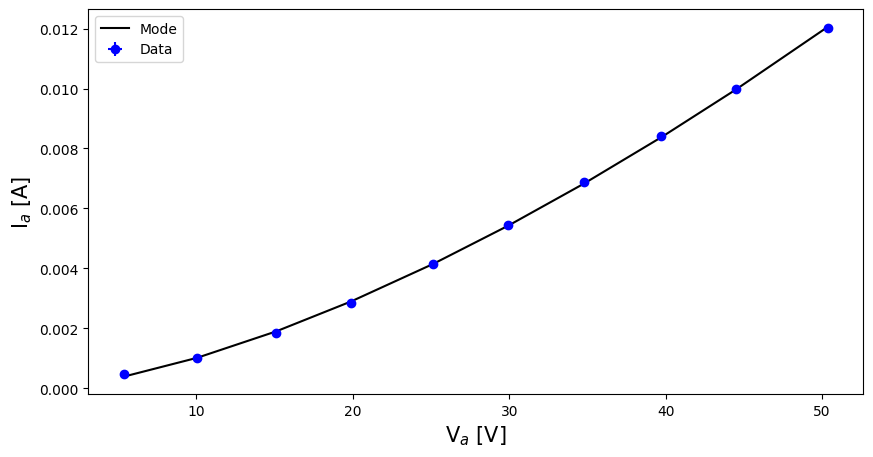

In [281]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# sns.scatterplot(
#     # data=positive,
#     x=positive['V (V)'][1:],
#     y=positive['I (A)'][1:],
#     color='blue',
#     ax=ax,
#     s=100,
#     label='Data'
# )
ax.errorbar(
    positive['V (V)'][1:],
    positive['I (A)'][1:],
    xerr=positive['dV (V)'][1:],
    yerr=positive['dI (A)'][1:],
    # capsize=15,
    fmt='o',
    color='blue',
    label='Data',
    # ms=15,
)
ax.set_xlabel(r'V$_a$ [V]', fontsize=fontsize)
ax.set_ylabel(r'I$_a$ [A]', fontsize=fontsize)

def power_law(x, c, k):
    return c * (x**k)

params, covariance = curve_fit(power_law, positive['V (V)'][1:], positive['I (A)'][1:])
c_fit, k_fit = params
ax.plot(
    positive['V (V)'][1:],
    power_law(positive['V (V)'][1:], c_fit, k_fit),
    c='k',
    label='Mode'
)
plt.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.savefig('../tex/figures/thermionic_emission_run_1.png', bbox_inches='tight')

In [157]:
perr = np.sqrt(np.diag(covariance))
error_in_exponent = perr[1]
error_in_exponent

np.float64(0.010080461015450737)

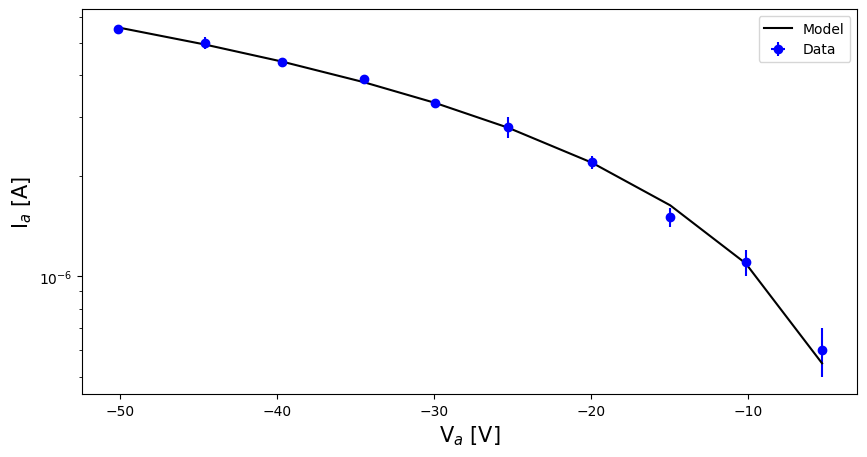

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# sns.scatterplot(
#     x=negative['V (V)'][1:],
#     y=negative['I (A)'][1:].abs(),
#     color='blue',
#     ax=ax,
#     s=100,
#     label='Data'
# )

ax.errorbar(
    negative['V (V)'][1:],
    negative['I (A)'][1:].abs(),
    fmt='o',
    yerr=negative['dI (A)'][1:],
    xerr=negative['dV (V)'][1:],
    color='blue',
    label='Data'
)

params_run2, covariance_run2 = curve_fit(linear_func, negative['V (V)'][1:], negative['I (A)'][1:].abs())
c_fit_run2, k_fit_run2 = params_run2
ax.plot(
    negative['V (V)'][1:],
    linear_func(negative['V (V)'][1:], c_fit_run2, k_fit_run2),
    c='k',
    label='Model'
)
ax.set_xlabel(r'V$_a$ [V]', fontsize=fontsize)
ax.set_ylabel(r'I$_a$ [A]', fontsize=fontsize)
ax.set_yscale('log')
ax.legend()
plt.savefig('../tex/figures/thermionic_emission_run_2.png', bbox_inches='tight')

## -12 v bias

In [333]:
data_f = pd.read_csv('../data/positive_minus_12_bias.csv') # forward bias with -12 V bias
# data_r = pd.read_csv("../data/minus_minus_12_bias.csv", delimiter='\t') # reverse bias with -12 V bias

In [334]:
data_f

,V (V),dV (V),I (mA),dI (mA)
0,-0.003,0.001,1.2285,0.0007
1,5.257,0.007,2.2950,0.0001
2,10.226,0.001,3.4700,0.0001
3,15.066,0.001,4.7257,0.0001
4,19.735,0.002,6.0233,0.0001
5,25.080,0.003,7.6015,0.0004
6,29.741,0.001,9.0531,0.0030
7,34.376,0.001,10.5630,0.0008
8,39.250,0.001,12.2270,0.0010
9,44.287,0.002,14.0230,0.0010


In [338]:
data_f['I (A)'] = df['I (mA)'] / 1000.
data_f['dI (A)'] = df['dI (mA)'] / 1000.

In [339]:
data_f

,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,-0.003,0.001,1.2285,0.0007,5.800000e-06,1.000000e-07
1,5.257,0.007,2.2950,0.0001,-6.000000e-07,1.000000e-07
2,10.226,0.001,3.4700,0.0001,-1.100000e-06,1.000000e-07
3,15.066,0.001,4.7257,0.0001,-1.500000e-06,1.000000e-07
4,19.735,0.002,6.0233,0.0001,-2.200000e-06,1.000000e-07
5,25.080,0.003,7.6015,0.0004,-2.800000e-06,2.000000e-07
6,29.741,0.001,9.0531,0.0030,-3.300000e-06,1.000000e-07
7,34.376,0.001,10.5630,0.0008,-3.900000e-06,1.000000e-07
8,39.250,0.001,12.2270,0.0010,-4.400000e-06,1.000000e-07
9,44.287,0.002,14.0230,0.0010,-5.000000e-06,2.000000e-07


In [327]:
data_f['V (V)'] += 11
data_f

,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,10.997,0.001,1.2285,0.0007,5.800000e-06,1.000000e-07
1,16.257,0.007,2.2950,0.0001,-6.000000e-07,1.000000e-07
2,21.226,0.001,3.4700,0.0001,-1.100000e-06,1.000000e-07
3,26.066,0.001,4.7257,0.0001,-1.500000e-06,1.000000e-07
4,30.735,0.002,6.0233,0.0001,-2.200000e-06,1.000000e-07
5,36.080,0.003,7.6015,0.0004,-2.800000e-06,2.000000e-07
6,40.741,0.001,9.0531,0.0030,-3.300000e-06,1.000000e-07
7,45.376,0.001,10.5630,0.0008,-3.900000e-06,1.000000e-07
8,50.250,0.001,12.2270,0.0010,-4.400000e-06,1.000000e-07
9,55.287,0.002,14.0230,0.0010,-5.000000e-06,2.000000e-07


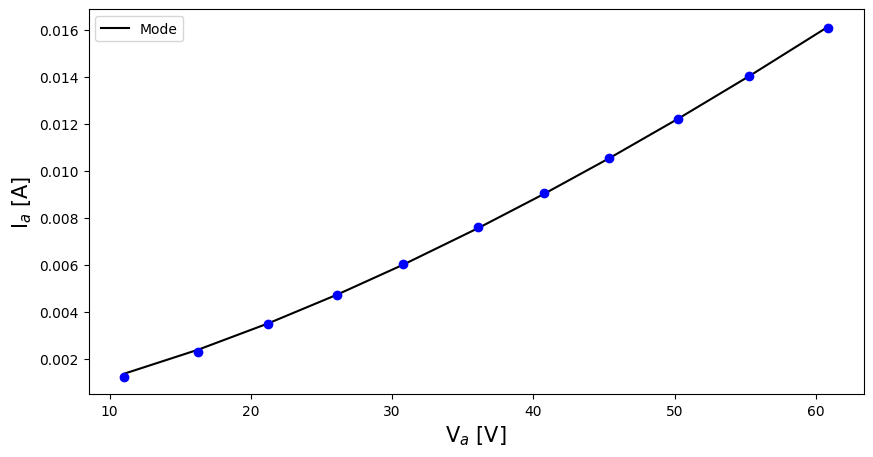

In [346]:
x = data_f['V (V)'].to_numpy() + 11
y = data_f['I (mA)'].to_numpy() / 1000

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(
    x, y, 
    xerr=data_f['dV (V)'],
    yerr=data_f['dI (A)'],
    fmt='o',
    color='blue'
)

params, covariance = curve_fit(power_law,x, y)
c_fit, k_fit = params
ax.plot(
    x,
    power_law(x, c_fit, k_fit),
    c='k',
    label='Mode'
)

ax.set_xlabel(r'V$_a$ [V]', fontsize=fontsize)
ax.set_ylabel(r'I$_a$ [A]', fontsize=fontsize)

plt.legend()
plt.savefig('../tex/figures/thermionic_emission_run_3.png', bbox_inches='tight')

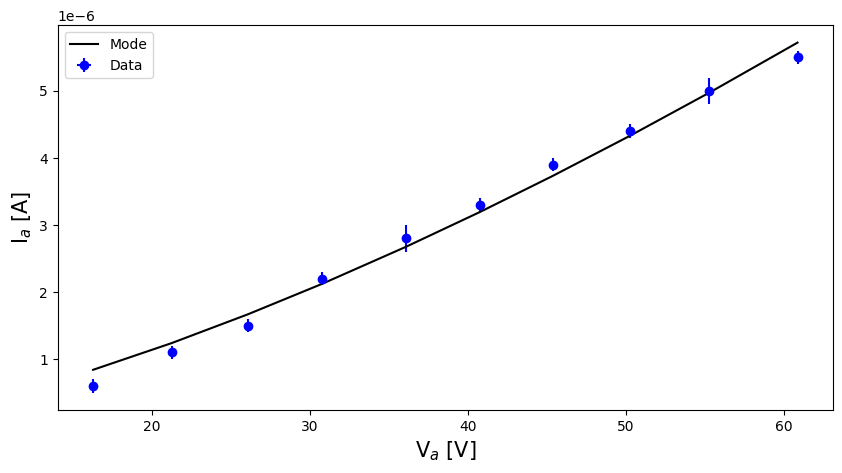

In [318]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# sns.scatterplot(
#     x=data_f['V (V)'][1:],
#     y=data_f['I (A)'][1:].abs(),
#     color='blue',
#     label='Data',
#     ax=ax,
#     s=100
# )

ax.errorbar(
    data_f['V (V)'][1:]+11,
    data_f['I (A)'][1:].abs(),
    fmt='o',
    yerr=data_f['dI (A)'][1:],
    xerr=data_f['dV (V)'][1:],
    color='blue',
    label='Data'
)

params, covariance = curve_fit(power_law, data_f['V (V)'][1:]+11, data_f['I (A)'][1:].abs())
c_fit, k_fit = params
ax.plot(
    data_f['V (V)'][1:]+11,
    power_law(data_f['V (V)'][1:]+11, c_fit, k_fit),
    c='k',
    label='Mode'
)

ax.set_xlabel(r'V$_a$ [V]', fontsize=fontsize)
ax.set_ylabel(r'I$_a$ [A]', fontsize=fontsize)

plt.legend()
plt.savefig('../tex/figures/thermionic_emission_run_3.png', bbox_inches='tight')

In [159]:
perr = np.sqrt(np.diag(covariance))
error_in_exponent = perr[1]
error_in_exponent

np.float64(0.020288061465243337)

In [152]:
data_r = pd.read_csv('../data/minus_minus_12_bias.csv', delimiter='\t')
data_r['I (A)'] = data_r['I (mA)'] / 1000
data_r['dI (A)'] = data_r['dI (mA)'] / 1000
data_r

,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,-10.1752,0.0008,0.0469,0.0001,0.000047,1.000000e-07
1,-14.9670,0.0010,-0.0015,0.0001,-0.000002,1.000000e-07
2,-20.1450,0.0020,-0.0021,0.0001,-0.000002,1.000000e-07
3,-25.0150,0.0030,-0.0026,0.0001,-0.000003,1.000000e-07
4,-29.8670,0.0030,-0.0031,0.0001,-0.000003,1.000000e-07
5,-34.7640,0.0040,-0.0037,0.0001,-0.000004,1.000000e-07
6,-39.6990,0.0020,-0.0043,0.0001,-0.000004,1.000000e-07
7,-44.6180,0.0030,-0.0048,0.0001,-0.000005,1.000000e-07
8,-50.5250,0.0010,-0.0054,0.0001,-0.000005,1.000000e-07


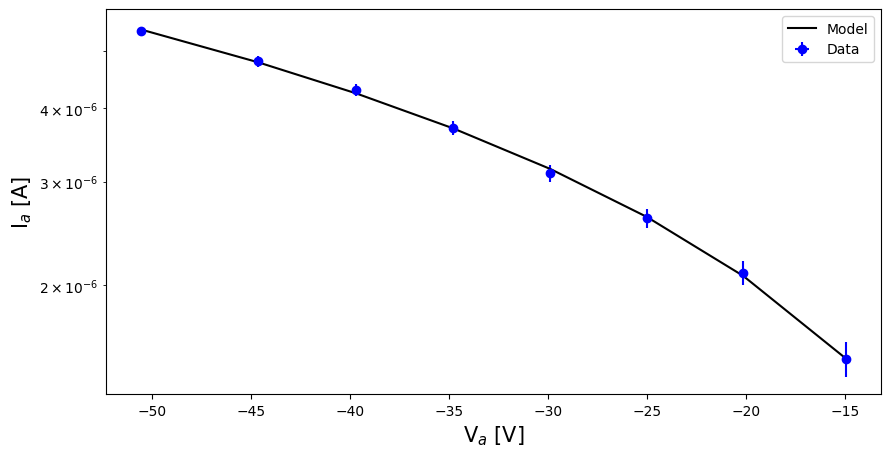

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.errorbar(
    data_r['V (V)'][1:],
    data_r['I (A)'][1:].abs(),
    fmt='o',
    yerr=data_r['dI (A)'][1:],
    xerr=data_r['dV (V)'][1:],
    color='blue',
    label='Data'
)

# plt.show()
ax.set_xlabel(r'V$_a$ [V]', fontsize=fontsize)
ax.set_ylabel(r'I$_a$ [A]', fontsize=fontsize)

def power_law(x, c, k):
    return c * (x**k)

p0 = [1., 1.,]
params, covariance = curve_fit(linear_func, data_r['V (V)'][1:], data_r['I (A)'].abs()[1:], p0=p0, maxfev=10000)
c_fit_r, k_fit_r = params
ax.plot(
    data_r['V (V)'][1:],
    linear_func(data_r['V (V)'][1:], c_fit_r, k_fit_r),
    c='k',
    label='Model'
)
ax.set_yscale('log')
plt.legend()

plt.savefig('../tex/figures/thermionic_emission_run_4.png', bbox_inches='tight')

In [280]:
temp = positive.copy()
temp['x']

,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,0.001,0.003,0.0086,0.0001,0.000009,1.000000e-07
1,5.350,0.010,0.4612,0.0005,0.000461,5.000000e-07
2,10.043,0.002,0.9907,0.0003,0.000991,3.000000e-07
3,15.087,0.001,1.8264,0.0002,0.001826,2.000000e-07
4,19.879,0.001,2.8418,0.0001,0.002842,1.000000e-07
5,25.133,0.001,4.1371,0.0003,0.004137,3.000000e-07
6,29.922,0.001,5.4439,0.0003,0.005444,3.000000e-07
7,34.751,0.010,6.8651,0.0005,0.006865,5.000000e-07
8,39.721,0.001,8.4129,0.0002,0.008413,2.000000e-07
9,44.488,0.003,9.9814,0.0007,0.009981,7.000000e-07


# Vacuum Triode

In [160]:
vacuum = pd.read_csv('../data/vacuum_data.csv')
vacuum['Anode Current (A)'] = vacuum['Anode Current (mA)'] / 1000
vacuum['delta Anode Current (A)'] = vacuum['delta Anode Current (mA)'] / 1000
vacuum['Grid Current (A)'] = vacuum['Grid Current (mA)'] / 1000
vacuum['delta Grid Current (A)'] = vacuum['delta Grid Current (mA)'] / 1000

## Plot both currents vs grid bias

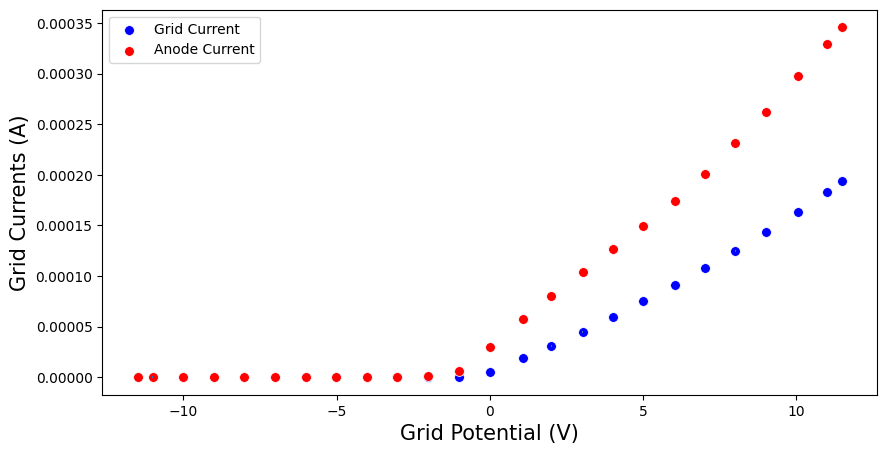

In [290]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(
    y=vacuum['Grid Current (A)'].abs(),
    x=vacuum['Grid Potential  (V)'],
    color='blue',
    ax=ax,
    label='Grid Current',
    s=50
)
ax.errorbar(
    vacuum['Grid Potential  (V)'],
    vacuum['Grid Current (A)'].abs(),
    fmt='none',
    xerr=vacuum[' delta Grid Potential (V)'],
    # elinewidth=100
)
sns.scatterplot(
    y=vacuum['Anode Current (A)'].abs(),
    x=vacuum['Grid Potential  (V)'],
    color='red',
    ax=ax,
    label='Anode Current',
    s=50
)
ax.set_xlabel('Grid Potential (V)', fontsize=fontsize)
ax.set_ylabel('Grid Currents (A)', fontsize=fontsize)
plt.savefig('../tex/figures/vacuum_triode_currents_vs_grid_potential.png', bbox_inches='tight')

## Current Gain vs Voltage

Current gain = anode current / grid current

In [186]:
vacuum['Current Gain'] = vacuum['Anode Current (A)'].abs() / vacuum['Grid Current (A)'].abs()
vacuum['delta Current Gain'] = vacuum['Current Gain'] * np.sqrt((vacuum['delta Anode Current (A)'] / vacuum['Anode Current (A)'])**2 \
                                                                 +(vacuum['delta Grid Current (A)'] / vacuum['Grid Current (A)'])**2)
vacuum

,Grid Potential (V),delta Grid Potential (V),Anode Current (mA),delta Anode Current (mA),Grid Current (mA),delta Grid Current (mA),Anode Current (A),delta Anode Current (A),Grid Current (A),delta Grid Current (A),Current Gain,delta Current Gain
0,0.008,0.001,-0.0296,0.0001,-0.0052,0.0001,-2.960000e-05,1.000000e-07,-5.200000e-06,1.000000e-07,5.692308,0.111144
1,1.073,0.002,-0.0572,0.0003,-0.0188,0.0001,-5.720000e-05,3.000000e-07,-1.880000e-05,1.000000e-07,3.042553,0.022728
2,2.011,0.002,-0.0802,0.0003,-0.0312,0.0001,-8.020000e-05,3.000000e-07,-3.120000e-05,1.000000e-07,2.570513,0.012662
3,3.024,0.001,-0.1039,0.0001,-0.0449,0.0001,-1.039000e-04,1.000000e-07,-4.490000e-05,1.000000e-07,2.314031,0.005614
4,4.025,0.001,-0.1263,0.0002,-0.0598,0.0001,-1.263000e-04,2.000000e-07,-5.980000e-05,1.000000e-07,2.112040,0.004864
5,5.006,0.001,-0.1490,0.0001,-0.0752,0.0001,-1.490000e-04,1.000000e-07,-7.520000e-05,1.000000e-07,1.981383,0.002951
6,6.032,0.001,-0.1745,0.0001,-0.0916,0.0002,-1.745000e-04,1.000000e-07,-9.160000e-05,2.000000e-07,1.905022,0.004300
7,7.015,0.002,-0.2013,0.0001,-0.1078,0.0001,-2.013000e-04,1.000000e-07,-1.078000e-04,1.000000e-07,1.867347,0.001965
8,8.016,0.001,-0.2310,0.0002,-0.1250,0.0001,-2.310000e-04,2.000000e-07,-1.250000e-04,1.000000e-07,1.848000,0.002178
9,9.020,0.002,-0.2625,0.0001,-0.1432,0.0001,-2.625000e-04,1.000000e-07,-1.432000e-04,1.000000e-07,1.833101,0.001458


In [293]:
test

,Grid Potential (V),delta Grid Potential (V),Anode Current (mA),delta Anode Current (mA),Grid Current (mA),delta Grid Current (mA),Anode Current (A),delta Anode Current (A),Grid Current (A),delta Grid Current (A),Current Gain,delta Current Gain,Power Input (W),delta Power Input (W),Power Output (W),delta Power Output (W),Power Gain,delta Power Gain
1,1.073,0.002,-0.0572,0.0003,-0.0188,0.0001,-0.000057,3.000000e-07,-0.000019,1.000000e-07,3.042553,0.022728,0.000020,1.136972e-07,0.002862,0.000015,141.868613,1.092254
2,2.011,0.002,-0.0802,0.0003,-0.0312,0.0001,-0.000080,3.000000e-07,-0.000031,1.000000e-07,2.570513,0.012662,0.000063,2.105587e-07,0.004013,0.000015,63.952212,0.321386
3,3.024,0.001,-0.1039,0.0001,-0.0449,0.0001,-0.000104,1.000000e-07,-0.000045,1.000000e-07,2.314031,0.005614,0.000136,3.057152e-07,0.005198,0.000005,38.285585,0.093752
4,4.025,0.001,-0.1263,0.0002,-0.0598,0.0001,-0.000126,2.000000e-07,-0.000060,1.000000e-07,2.112040,0.004864,0.000241,4.069180e-07,0.006319,0.000010,26.253315,0.060815
5,5.006,0.001,-0.1490,0.0001,-0.0752,0.0001,-0.000149,1.000000e-07,-0.000075,1.000000e-07,1.981383,0.002951,0.000376,5.062168e-07,0.007455,0.000005,19.802747,0.029764
6,6.032,0.001,-0.1745,0.0001,-0.0916,0.0002,-0.000174,1.000000e-07,-0.000092,2.000000e-07,1.905022,0.004300,0.000553,1.209873e-06,0.008731,0.000005,15.801070,0.035766
7,7.015,0.002,-0.2013,0.0001,-0.1078,0.0001,-0.000201,1.000000e-07,-0.000108,1.000000e-07,1.867347,0.001965,0.000756,7.338839e-07,0.010071,0.000005,13.318190,0.014522
8,8.016,0.001,-0.2310,0.0002,-0.1250,0.0001,-0.000231,2.000000e-07,-0.000125,1.000000e-07,1.848000,0.002178,0.001002,8.112876e-07,0.011557,0.000010,11.534323,0.013675
9,9.020,0.002,-0.2625,0.0001,-0.1432,0.0001,-0.000263,1.000000e-07,-0.000143,1.000000e-07,1.833101,0.001458,0.001292,9.463768e-07,0.013133,0.000005,10.167815,0.008399
10,10.067,0.001,-0.2972,0.0001,-0.1637,0.0001,-0.000297,1.000000e-07,-0.000164,1.000000e-07,1.815516,0.001266,0.001648,1.019923e-06,0.014870,0.000005,9.022937,0.006359


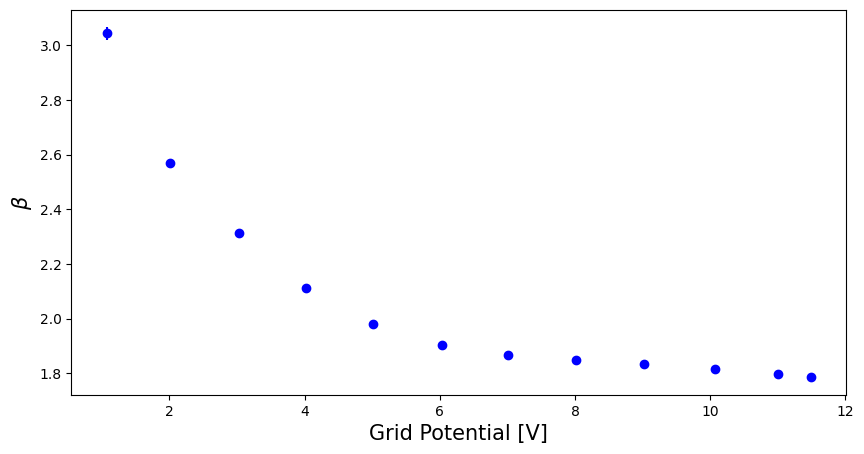

In [276]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# sns.scatterplot(
#     x=vacuum['Grid Potential  (V)'].abs(),
#     y=vacuum['Current Gain'],
#     color='green',
#     ax=ax,
# )
ax.set_ylabel(r'$\beta$', fontsize=fontsize)
ax.set_xlabel('Grid Potential [V]', fontsize=fontsize)

test = vacuum.query('`Grid Potential  (V)` > 1')
ax.errorbar(
    test['Grid Potential  (V)'],
    test['Current Gain'],
    xerr=test[' delta Grid Potential (V)'],
    yerr=test['delta Current Gain'],
    fmt='o',
    color='blue'
)
plt.savefig('../tex/figures/vacuum_triode_current_gain_vs_grid_potential.png', bbox_inches='tight')

In [255]:
anode_current = vacuum['Anode Current (A)']
delta_anode_current = vacuum['delta Anode Current (A)']
grid_current = vacuum['Grid Current (A)']
delta_grid_current = vacuum['delta Grid Current (A)']
grid_potential = vacuum['Grid Potential  (V)']
delta_grid_potential = vacuum[' delta Grid Potential (V)']

vacuum['Power Input (W)'] = grid_current.abs() * grid_potential
power_input = vacuum['Power Input (W)']
vacuum['delta Power Input (W)'] = power_input * np.sqrt((delta_grid_current / grid_current)**2\
                                                         + (delta_grid_potential / grid_potential)**2)

vacuum['Power Output (W)'] = anode_current.abs() * 50.032 # anode current
power_output = vacuum['Power Output (W)']
vacuum['delta Power Output (W)'] = power_output * np.sqrt((delta_anode_current / anode_current)**2\
                                                         + (0.001 / 50.032)**2)

vacuum['Power Gain'] = power_output / power_input
vacuum['delta Power Gain'] = vacuum['Power Gain'] * np.sqrt(
    (vacuum['delta Power Input (W)'] / vacuum['Power Input (W)'])**2 + 
    (vacuum['delta Power Output (W)'] / vacuum['Power Output (W)'])**2
)
vacuum

,Grid Potential (V),delta Grid Potential (V),Anode Current (mA),delta Anode Current (mA),Grid Current (mA),delta Grid Current (mA),Anode Current (A),delta Anode Current (A),Grid Current (A),delta Grid Current (A),Current Gain,delta Current Gain,Power Input (W),delta Power Input (W),Power Output (W),delta Power Output (W),Power Gain,delta Power Gain
0,0.008,0.001,-0.0296,0.0001,-0.0052,0.0001,-2.960000e-05,1.000000e-07,-5.200000e-06,1.000000e-07,5.692308,0.111144,4.160000e-08,5.261179e-09,0.001481,0.000005,35599.692308,4503.921959
1,1.073,0.002,-0.0572,0.0003,-0.0188,0.0001,-5.720000e-05,3.000000e-07,-1.880000e-05,1.000000e-07,3.042553,0.022728,2.017240e-05,1.136972e-07,0.002862,0.000015,141.868613,1.092254
2,2.011,0.002,-0.0802,0.0003,-0.0312,0.0001,-8.020000e-05,3.000000e-07,-3.120000e-05,1.000000e-07,2.570513,0.012662,6.274320e-05,2.105587e-07,0.004013,0.000015,63.952212,0.321386
3,3.024,0.001,-0.1039,0.0001,-0.0449,0.0001,-1.039000e-04,1.000000e-07,-4.490000e-05,1.000000e-07,2.314031,0.005614,1.357776e-04,3.057152e-07,0.005198,0.000005,38.285585,0.093752
4,4.025,0.001,-0.1263,0.0002,-0.0598,0.0001,-1.263000e-04,2.000000e-07,-5.980000e-05,1.000000e-07,2.112040,0.004864,2.406950e-04,4.069180e-07,0.006319,0.000010,26.253315,0.060815
5,5.006,0.001,-0.1490,0.0001,-0.0752,0.0001,-1.490000e-04,1.000000e-07,-7.520000e-05,1.000000e-07,1.981383,0.002951,3.764512e-04,5.062168e-07,0.007455,0.000005,19.802747,0.029764
6,6.032,0.001,-0.1745,0.0001,-0.0916,0.0002,-1.745000e-04,1.000000e-07,-9.160000e-05,2.000000e-07,1.905022,0.004300,5.525312e-04,1.209873e-06,0.008731,0.000005,15.801070,0.035766
7,7.015,0.002,-0.2013,0.0001,-0.1078,0.0001,-2.013000e-04,1.000000e-07,-1.078000e-04,1.000000e-07,1.867347,0.001965,7.562170e-04,7.338839e-07,0.010071,0.000005,13.318190,0.014522
8,8.016,0.001,-0.2310,0.0002,-0.1250,0.0001,-2.310000e-04,2.000000e-07,-1.250000e-04,1.000000e-07,1.848000,0.002178,1.002000e-03,8.112876e-07,0.011557,0.000010,11.534323,0.013675
9,9.020,0.002,-0.2625,0.0001,-0.1432,0.0001,-2.625000e-04,1.000000e-07,-1.432000e-04,1.000000e-07,1.833101,0.001458,1.291664e-03,9.463768e-07,0.013133,0.000005,10.167815,0.008399


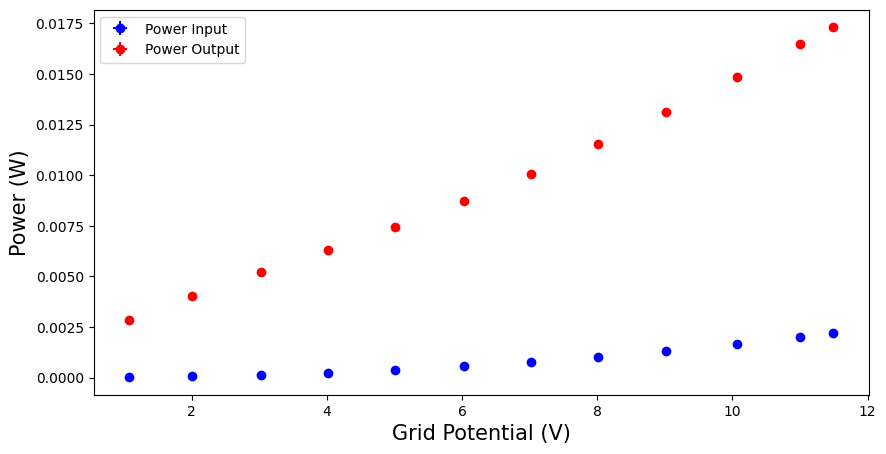

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
test = vacuum.query('`Grid Potential  (V)` > 1')
ax.errorbar(
    test['Grid Potential  (V)'],
    test['Power Input (W)'],
    fmt='o',
    color='blue',
    xerr=test[' delta Grid Potential (V)'],
    yerr=test['delta Power Input (W)'].abs(),
    label='Power Input'
)
# ax.set_xlabel('Grid Potential (V)', fontsize=fontsize)
# ax.set_ylabel('Power Input (W)', fontsize=fontsize)
# plt.savefig('../tex/figures/vacuum_triode_power_input_vs_grid_potential.png', bbox_inches='tight')

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# test = vacuum.query('`Grid Potential  (V)` > 0')
ax.errorbar(
    test['Grid Potential  (V)'],
    test['Power Output (W)'],
    fmt='o',
    color='red',
    xerr=test[' delta Grid Potential (V)'],
    yerr=test['delta Power Output (W)'].abs(),
    label='Power Output'
)
ax.set_xlabel('Grid Potential (V)', fontsize=fontsize)
ax.set_ylabel('Power (W)', fontsize=fontsize)
plt.legend()
plt.savefig('../tex/figures/vacuum_triode_power_vs_grid_potential.png', bbox_inches='tight')

In [312]:
dy_dx = np.gradient(test['Anode Current (A)'], test['Grid Potential  (V)'])
max_slope_index = np.argmax(dy_dx)
x_max_slope = test['Grid Potential  (V)'][max_slope_index]
y_max_slope = dy_dx[max_slope_index]
print(x_max_slope)
print(y_max_slope)
print(dy_dx)

dy_dx = np.gradient(test['Grid Current (A)'], test['Grid Potential  (V)'])
max_slope_index = np.argmax(dy_dx)
# x_max_slope = test['Grid Potential  (V)'][max_slope_index]
y_max_slope = dy_dx[max_slope_index]
print(x_max_slope)
print(y_max_slope)

3.024
-2.2762482654260935e-05
[-2.45202559e-05 -2.39796669e-05 -2.28837047e-05 -2.27624827e-05
 -2.39775104e-05 -2.60844281e-05 -2.84559862e-05 -3.05211409e-05
 -3.22398753e-05 -3.35252135e-05 -3.43225854e-05 -3.45603272e-05]
3.024
-1.321961620469083e-05


In [308]:
vacuum

,Grid Potential (V),delta Grid Potential (V),Anode Current (mA),delta Anode Current (mA),Grid Current (mA),delta Grid Current (mA),Anode Current (A),delta Anode Current (A),Grid Current (A),delta Grid Current (A),Current Gain,delta Current Gain,Power Input (W),delta Power Input (W),Power Output (W),delta Power Output (W),Power Gain,delta Power Gain
0,0.008,0.001,-0.0296,0.0001,-0.0052,0.0001,-2.960000e-05,1.000000e-07,-5.200000e-06,1.000000e-07,5.692308,0.111144,4.160000e-08,5.261179e-09,0.001481,0.000005,35599.692308,4503.921959
1,1.073,0.002,-0.0572,0.0003,-0.0188,0.0001,-5.720000e-05,3.000000e-07,-1.880000e-05,1.000000e-07,3.042553,0.022728,2.017240e-05,1.136972e-07,0.002862,0.000015,141.868613,1.092254
2,2.011,0.002,-0.0802,0.0003,-0.0312,0.0001,-8.020000e-05,3.000000e-07,-3.120000e-05,1.000000e-07,2.570513,0.012662,6.274320e-05,2.105587e-07,0.004013,0.000015,63.952212,0.321386
3,3.024,0.001,-0.1039,0.0001,-0.0449,0.0001,-1.039000e-04,1.000000e-07,-4.490000e-05,1.000000e-07,2.314031,0.005614,1.357776e-04,3.057152e-07,0.005198,0.000005,38.285585,0.093752
4,4.025,0.001,-0.1263,0.0002,-0.0598,0.0001,-1.263000e-04,2.000000e-07,-5.980000e-05,1.000000e-07,2.112040,0.004864,2.406950e-04,4.069180e-07,0.006319,0.000010,26.253315,0.060815
5,5.006,0.001,-0.1490,0.0001,-0.0752,0.0001,-1.490000e-04,1.000000e-07,-7.520000e-05,1.000000e-07,1.981383,0.002951,3.764512e-04,5.062168e-07,0.007455,0.000005,19.802747,0.029764
6,6.032,0.001,-0.1745,0.0001,-0.0916,0.0002,-1.745000e-04,1.000000e-07,-9.160000e-05,2.000000e-07,1.905022,0.004300,5.525312e-04,1.209873e-06,0.008731,0.000005,15.801070,0.035766
7,7.015,0.002,-0.2013,0.0001,-0.1078,0.0001,-2.013000e-04,1.000000e-07,-1.078000e-04,1.000000e-07,1.867347,0.001965,7.562170e-04,7.338839e-07,0.010071,0.000005,13.318190,0.014522
8,8.016,0.001,-0.2310,0.0002,-0.1250,0.0001,-2.310000e-04,2.000000e-07,-1.250000e-04,1.000000e-07,1.848000,0.002178,1.002000e-03,8.112876e-07,0.011557,0.000010,11.534323,0.013675
9,9.020,0.002,-0.2625,0.0001,-0.1432,0.0001,-2.625000e-04,1.000000e-07,-1.432000e-04,1.000000e-07,1.833101,0.001458,1.291664e-03,9.463768e-07,0.013133,0.000005,10.167815,0.008399


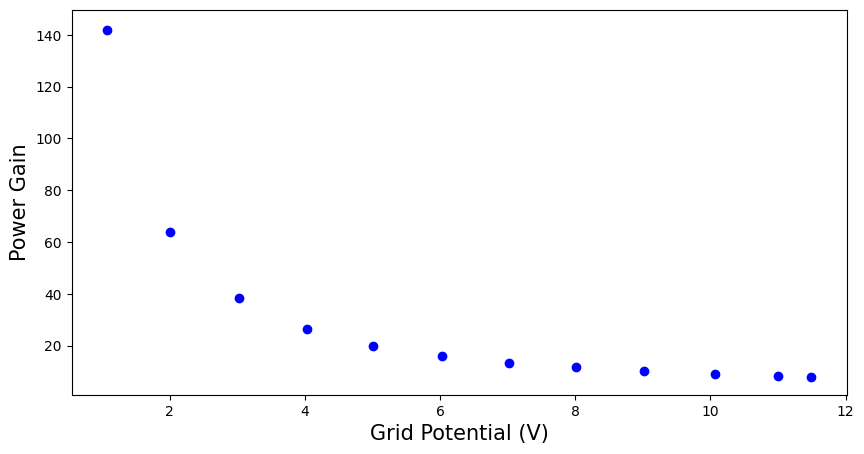

In [279]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
test = vacuum.query('`Grid Potential  (V)` > 0.5')
ax.errorbar(
    test['Grid Potential  (V)'],
    test['Power Gain'],
    xerr=test[' delta Grid Potential (V)'],
    yerr=test['delta Power Gain'],
    fmt='o',
    c='blue'
)
ax.set_xlabel('Grid Potential (V)', fontsize=fontsize)
ax.set_ylabel('Power Gain', fontsize=fontsize)
plt.savefig('../tex/figures/vacuum_tube_power_gain_vs_grid_potential.png', bbox_inches='tight')